In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')
%matplotlib notebook

In [2]:
#Data import
air = pd.read_csv("Datasets/AirQualityData/city_day.csv")
air1 = air.iloc[:,:2]
air2 = air.iloc[:,-2]
air = air1.join(air2)

#Data Transformation
air.Date = pd.to_datetime(air.Date)
air.dropna(inplace=True)
air.drop(air.where(air.Date > '2017-12-31').dropna().index,inplace=True)
air.reset_index(inplace=True,drop=True)
air['Year'] = air.Date.dt.strftime('%Y')
air = air.groupby(['City','Year']).agg({'AQI':np.mean})
air.reset_index(inplace=True)
cities = air.groupby('City').Year.value_counts().unstack().fillna(0).sum(axis=1)
cities = list(cities.where(cities==3.0).dropna().index)
air = air.apply(lambda x:x if x['City'] in cities else None,axis=1).dropna()
air = air.pivot_table(values='AQI',index='City',columns='Year',aggfunc=np.mean,margins=True).rename(columns={'All':'Mean'})
air.drop('All',inplace=True)
air.sort_values(by='Mean',ascending=False,inplace=True)
air = air.iloc[:5,:-1]

In [3]:
#Import and transformation for second dataset
airdeath = pd.read_csv("Datasets/AirQualityData/deathRates.csv")

airdeath.drop(columns=['Code'],inplace=True)
airdeath = airdeath.where((airdeath.Entity == 'India') & (airdeath.Year >= 2015) ).dropna().iloc[:,:3]
airdeath.set_index('Year',inplace=True)
airdeath.drop(columns='Entity',inplace=True)

years = [str(int(x)) for x in airdeath.index]
deaths = [float("{:.0f}".format(x)) for x in list(airdeath.values.flatten())]
pos = np.arange(len(years))

<IPython.core.display.Javascript object>


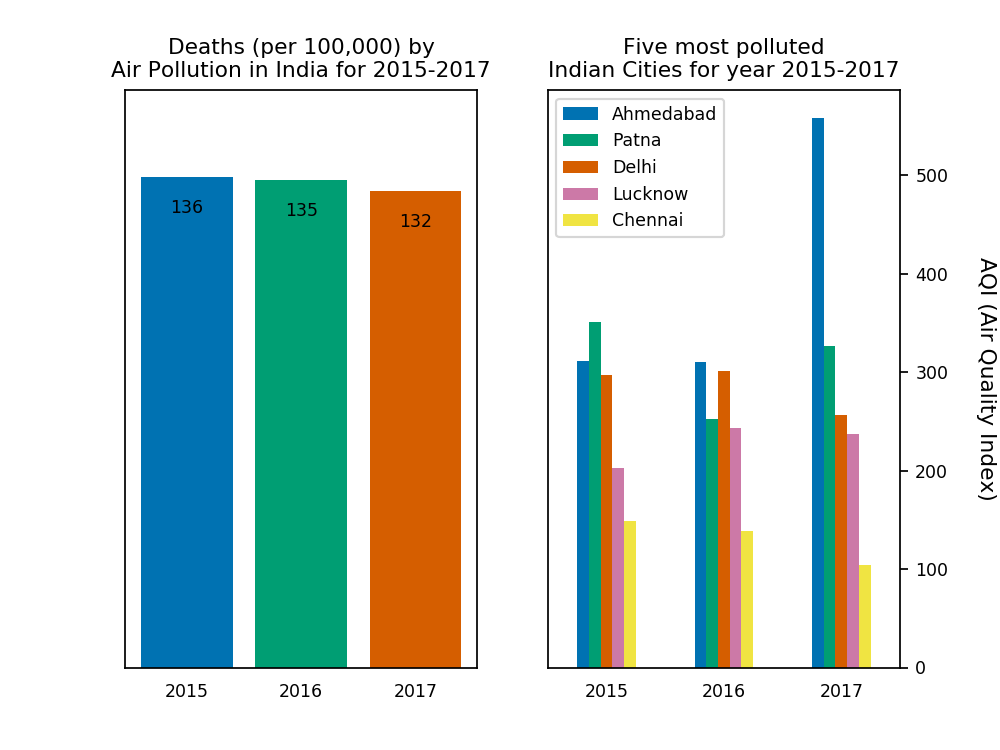

In [4]:
#Plotting
plt.figure();
ax1 = plt.subplot(121);
figure2 = ax1.bar(pos, deaths, align='center', linewidth=0);

#Getting color palette
palette = sns.color_palette().as_hex()
# use this to plot the palette
# sns.palplot(palette)

figure2[1].set_color(palette[1]);
figure2[2].set_color(palette[2]);
plt.ylim(bottom=0,top=160);
plt.xticks(pos, years,fontsize=8);
plt.title('Deaths (per 100,000) by\nAir Pollution in India for 2015-2017',fontsize=10);
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom='on');

for bar in figure2:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 10, str(int(height)), 
                 ha='center', color='black', fontsize=8)
    
ax2 = plt.subplot(122);
figure1 = air.T.plot.bar(ax=ax2);
figure1.set_xticklabels(['2015','2016','2017'],rotation=0,fontsize=8);
figure1.set_xlabel(None);
figure1.set_ylabel('AQI (Air Quality Index)',labelpad=22, fontsize=10, rotation=270);
figure1.set_title('Five most polluted\nIndian Cities for year 2015-2017',fontsize=10);
figure1.tick_params(top=False, bottom=False, left=False, right=True, labelleft=False, labelbottom=True, labelright=True);
figure1.legend(fontsize=8);
plt.yticks(fontsize=8);
ax2.yaxis.set_label_position('right');

# plt.savefig('result.png',dpi=600)